In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
from PIL import Image

ROOT = os.getcwd()
WORK_DIR = os.path.dirname(ROOT)

### ***Compute distance***

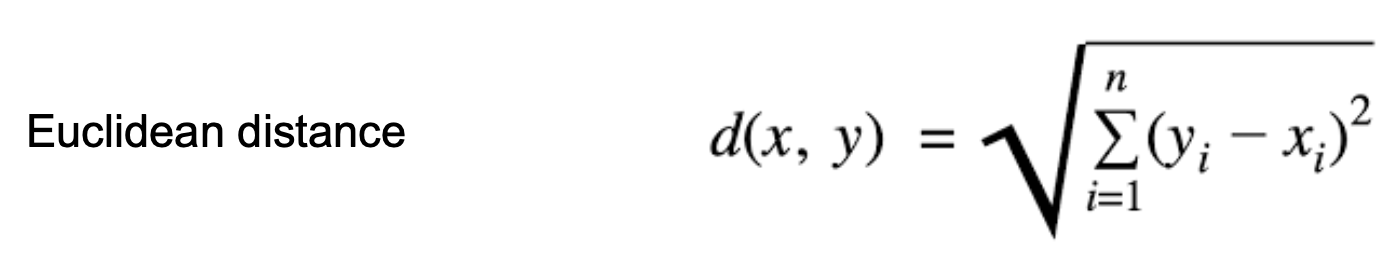

In [3]:
Image.open(os.path.join(WORK_DIR, 'images/Euclidean.png'))

In [4]:
def euclidean_distance(x, y):
    return np.sqrt(np.sum((y-x)**2))

### ***Setup KNN***

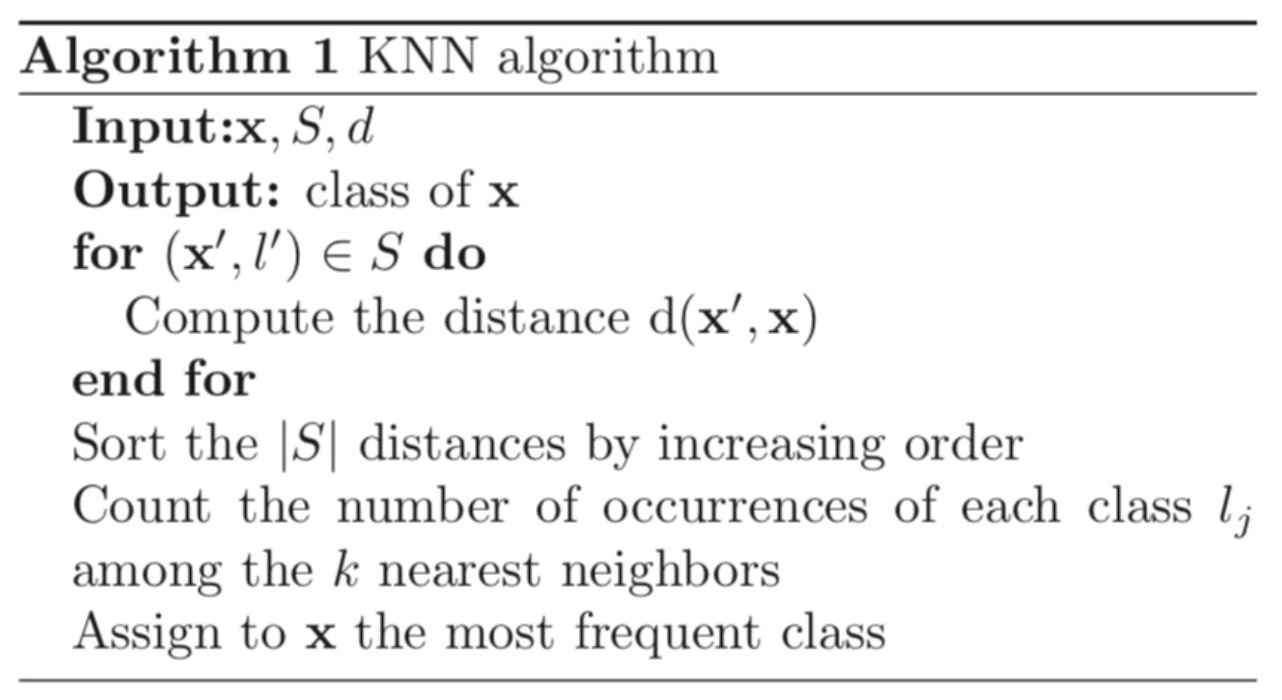

In [5]:
Image.open(os.path.join(WORK_DIR, 'images/knn.png'))

In [6]:
from collections import Counter

class KNN:
    '''
    Establish KNN algorithm
    '''
    def __init__(self, k) -> None:
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        prediction = [self._predict(x) for x in X_test]
        
        return prediction
    
    def _predict(self, X_test):
        # Compute the distance
        distance = [euclidean_distance(X_test, X_train) for X_train in self.X_train]
        
        # Get the closest k
        k_indices = np.argsort(distance)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Votes
        most_common = Counter(k_nearest_labels).most_common()
        

        return most_common[0][0]

In [7]:
from sklearn import datasets

data = datasets.load_iris()


In [8]:
target = pd.DataFrame({'Label': data.target.tolist()}, index=range(len(data.target.tolist())))
target.replace({0: 'Iris-Setosa', 1: 'Iris-Versicolour', 2: 'Iris-Virginica'}, inplace=True)

In [9]:
features = pd.DataFrame({'sepal_length': data.data[:,0].tolist(), 'sepal_width': data.data[:,1].tolist(),
                         'petal_length': data.data[:,2].tolist(), 'petal_width': data.data[:,-1].tolist()}, index=range(len(data.data[:, 0].tolist())))

df = pd.concat([features, target], axis=1)

In [11]:
from sklearn.model_selection import train_test_split

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y= df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
97,6.2,2.9,4.3,1.3
5,5.4,3.9,1.7,0.4
125,7.2,3.2,6.0,1.8
10,5.4,3.7,1.5,0.2
79,5.7,2.6,3.5,1.0
33,5.5,4.2,1.4,0.2
142,5.8,2.7,5.1,1.9
116,6.5,3.0,5.5,1.8
16,5.4,3.9,1.3,0.4
85,6.0,3.4,4.5,1.6


### ***Fixed the label: Not effective (Do not use)***

In [13]:
# Hyperparameter
K = 10


# Compute the distance
distances = [euclidean_distance(X_test.to_numpy(), X_sub_train) for X_sub_train in X_train.to_numpy()]
distances

[13.700364958642528,
 18.649932975750875,
 18.519179247472064,
 14.24710496908056,
 14.442991379904647,
 20.149441679609886,
 16.183324751113414,
 18.8132931726479,
 15.323185047502363,
 20.14398173152468,
 19.05885620912231,
 15.742299704935109,
 13.573503600765722,
 12.190980272316086,
 19.286783039169595,
 18.281137820168635,
 17.23426818869893,
 17.10087717048456,
 11.897898974188678,
 11.882760622010357,
 19.222382786741086,
 19.125898671696447,
 13.422369388450013,
 15.730225681788546,
 18.802127539190877,
 13.026127590347025,
 12.68384799656634,
 18.24828759089466,
 20.425474290698855,
 12.05487453273571,
 17.360299536586343,
 17.05754964817632,
 19.44222209522358,
 15.942396306703706,
 17.925400971805345,
 17.92205345377588,
 12.858460249967724,
 18.721645226849056,
 18.22690319280815,
 13.253678734600443,
 18.598924700100273,
 23.41495248767334,
 12.57934815481311,
 14.526527458412074,
 12.52038338071163,
 18.974192999967087,
 19.528952864913162,
 17.428711943227473,
 18.41955

In [14]:
# Get the closest k
k_indices = np.argsort(distances)[:K]
k_nearest_labels = [y_train.values.tolist()[i] for i in k_indices.tolist()]
k_nearest_labels

['Iris-Versicolour',
 'Iris-Versicolour',
 'Iris-Versicolour',
 'Iris-Versicolour',
 'Iris-Versicolour',
 'Iris-Versicolour',
 'Iris-Versicolour',
 'Iris-Versicolour',
 'Iris-Versicolour',
 'Iris-Versicolour']

In [15]:
from collections import Counter

most_common = Counter(k_nearest_labels).most_common()
most_common[0][0]

'Iris-Versicolour'

In [16]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test.to_numpy(), [most_common[0][0]] * y_test.to_numpy().shape[0])

In [17]:
acc

0.3333333333333333

In [18]:
acc = np.sum(most_common[0][0] == y_test.to_numpy()) / y_test.to_numpy().shape[0]

In [19]:
acc

0.3333333333333333

In [20]:
df_prediction = pd.concat([X_test, y_test],axis=1)
df_prediction['prediction'] = [most_common[0][0]] * df_prediction.shape[0]
df_prediction

,sepal_length,sepal_width,petal_length,petal_width,Label,prediction
97,6.2,2.9,4.3,1.3,Iris-Versicolour,Iris-Versicolour
5,5.4,3.9,1.7,0.4,Iris-Setosa,Iris-Versicolour
125,7.2,3.2,6.0,1.8,Iris-Virginica,Iris-Versicolour
10,5.4,3.7,1.5,0.2,Iris-Setosa,Iris-Versicolour
79,5.7,2.6,3.5,1.0,Iris-Versicolour,Iris-Versicolour
33,5.5,4.2,1.4,0.2,Iris-Setosa,Iris-Versicolour
142,5.8,2.7,5.1,1.9,Iris-Virginica,Iris-Versicolour
116,6.5,3.0,5.5,1.8,Iris-Virginica,Iris-Versicolour
16,5.4,3.9,1.3,0.4,Iris-Setosa,Iris-Versicolour
85,6.0,3.4,4.5,1.6,Iris-Versicolour,Iris-Versicolour


### ***Flexible method***

In [21]:
# Hyperparameter
K = 10

In [22]:
def _predict(X_train, X_test):
    
    # Compute the distance
    distances = [euclidean_distance(X_test, X_sub_train) for X_sub_train in X_train]
    
    # Get the closest k
    k_indices = np.argsort(distances)[:K]
    k_nearest_labels = [y_train.values.tolist()[i] for i in k_indices.tolist()]
    most_common = Counter(k_nearest_labels).most_common()
    
    return most_common[0][0]
    
def predict(X_test):
    
    prediction = [_predict(X_train.to_numpy(), x) for x in X_test]
    return prediction

In [23]:
prediction_func = predict(X_test.to_numpy())

In [24]:
prediction_func_results = pd.concat([X_test, y_test], axis=1)
prediction_func_results['prediction'] = prediction_func
prediction_func_results

,sepal_length,sepal_width,petal_length,petal_width,Label,prediction
97,6.2,2.9,4.3,1.3,Iris-Versicolour,Iris-Versicolour
5,5.4,3.9,1.7,0.4,Iris-Setosa,Iris-Setosa
125,7.2,3.2,6.0,1.8,Iris-Virginica,Iris-Virginica
10,5.4,3.7,1.5,0.2,Iris-Setosa,Iris-Setosa
79,5.7,2.6,3.5,1.0,Iris-Versicolour,Iris-Versicolour
33,5.5,4.2,1.4,0.2,Iris-Setosa,Iris-Setosa
142,5.8,2.7,5.1,1.9,Iris-Virginica,Iris-Virginica
116,6.5,3.0,5.5,1.8,Iris-Virginica,Iris-Virginica
16,5.4,3.9,1.3,0.4,Iris-Setosa,Iris-Setosa
85,6.0,3.4,4.5,1.6,Iris-Versicolour,Iris-Versicolour


In [25]:
clf = KNN(k=10)

clf.fit(X_train.to_numpy(), y_train.to_numpy())

prediction_cls = clf.predict(X_test.to_numpy())

print(prediction_cls)

['Iris-Versicolour', 'Iris-Setosa', 'Iris-Virginica', 'Iris-Setosa', 'Iris-Versicolour', 'Iris-Setosa', 'Iris-Virginica', 'Iris-Virginica', 'Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica', 'Iris-Virginica', 'Iris-Versicolour', 'Iris-Virginica', 'Iris-Virginica', 'Iris-Setosa', 'Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica', 'Iris-Setosa', 'Iris-Setosa', 'Iris-Versicolour', 'Iris-Setosa', 'Iris-Setosa', 'Iris-Virginica', 'Iris-Virginica', 'Iris-Versicolour', 'Iris-Versicolour', 'Iris-Virginica', 'Iris-Versicolour']


In [26]:
prediction_cls_results = pd.concat([X_test, y_test], axis=1)
prediction_cls_results['prediction'] = prediction_cls
prediction_cls_results

,sepal_length,sepal_width,petal_length,petal_width,Label,prediction
97,6.2,2.9,4.3,1.3,Iris-Versicolour,Iris-Versicolour
5,5.4,3.9,1.7,0.4,Iris-Setosa,Iris-Setosa
125,7.2,3.2,6.0,1.8,Iris-Virginica,Iris-Virginica
10,5.4,3.7,1.5,0.2,Iris-Setosa,Iris-Setosa
79,5.7,2.6,3.5,1.0,Iris-Versicolour,Iris-Versicolour
33,5.5,4.2,1.4,0.2,Iris-Setosa,Iris-Setosa
142,5.8,2.7,5.1,1.9,Iris-Virginica,Iris-Virginica
116,6.5,3.0,5.5,1.8,Iris-Virginica,Iris-Virginica
16,5.4,3.9,1.3,0.4,Iris-Setosa,Iris-Setosa
85,6.0,3.4,4.5,1.6,Iris-Versicolour,Iris-Versicolour


In [27]:
acc = accuracy_score(y_test.to_numpy(), prediction_cls)

In [28]:
print('Accuracy:', acc*100, '%')

Accuracy: 96.66666666666667 %


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

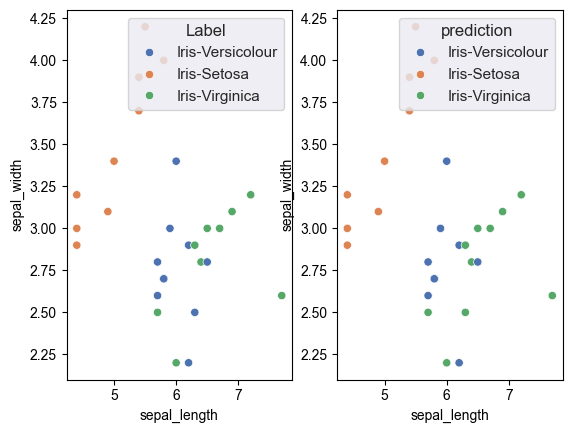

In [30]:
f, axes = plt.subplots(1, 2)
sns.set(rc={'figure.figsize':(20, 10)})
sns.scatterplot(data=prediction_cls_results, x="sepal_length", y="sepal_width", hue="Label", ax=axes[0])
sns.scatterplot(data=prediction_cls_results, x="sepal_length", y="sepal_width", hue="prediction", ax=axes[1])

<Axes: xlabel='petal_length', ylabel='petal_width'>

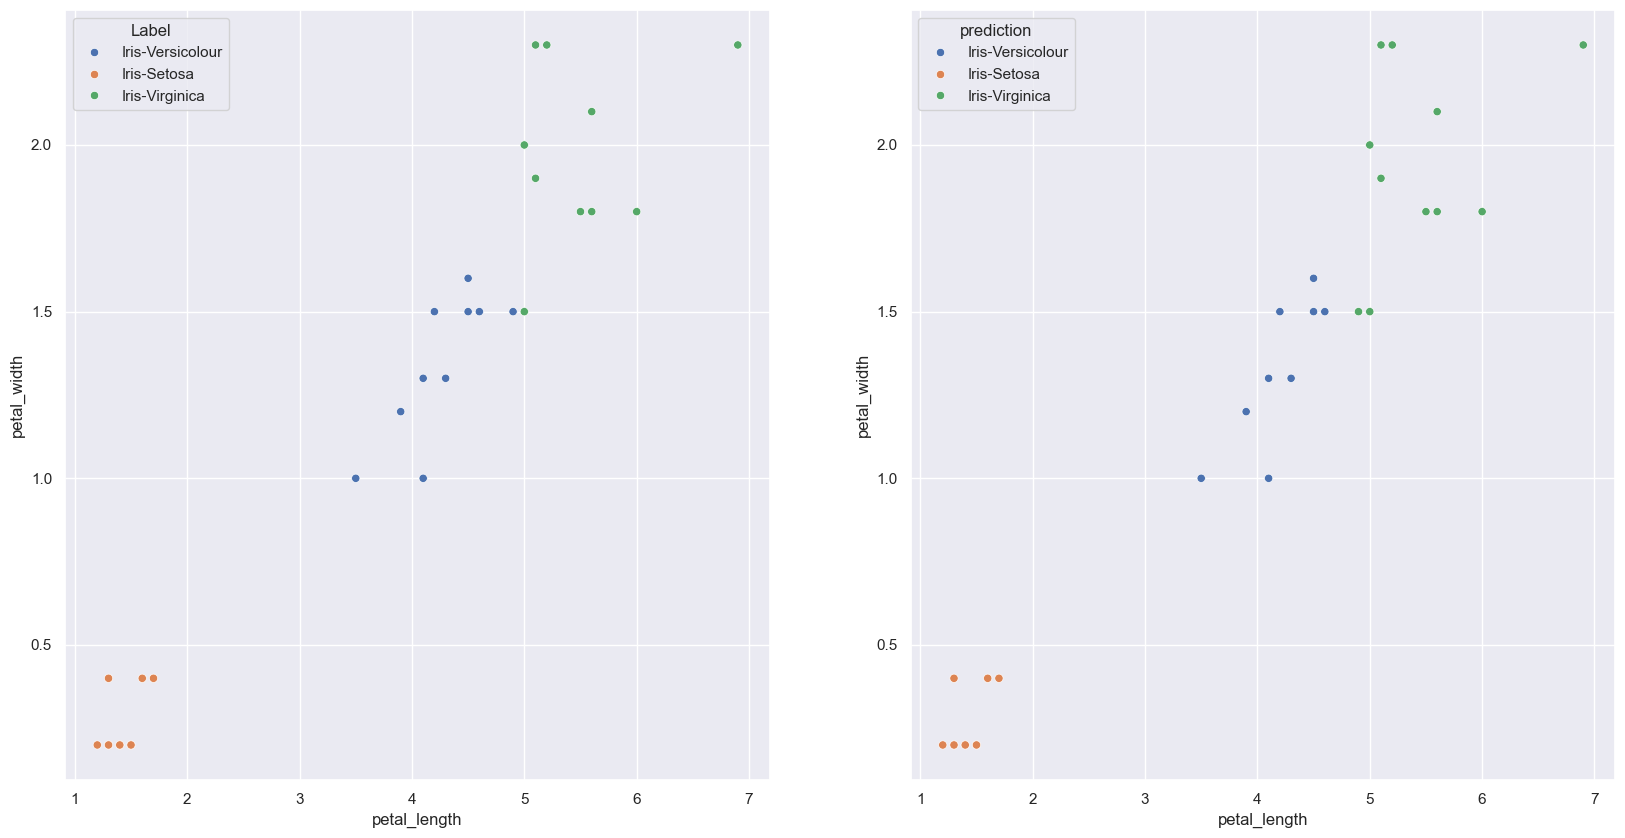

In [31]:
f, axes = plt.subplots(1, 2)
sns.set(rc={'figure.figsize':(20, 10)})
sns.scatterplot(data=prediction_cls_results, x="petal_length", y="petal_width", hue="Label", ax=axes[0])
sns.scatterplot(data=prediction_cls_results, x="petal_length", y="petal_width", hue="prediction", ax=axes[1])